# Feynman

From: http://gkantonius.github.io/feynman/auto_examples/index.html

In [3]:
from feynml import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points
from pyfeyn2.auto.label import auto_label

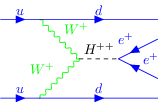

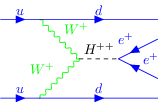

In [4]:
v1 = Vertex(x=-1,y=1)
v2 = Vertex(x=-1,y=-1)

v3 = Vertex(x=0,y=0)
v4 = Vertex(x=1,y=0)

i1 = Leg(x=-2,y=1,target=v1.id,name="u").with_incoming()
i2 = Leg(x=-2,y=-1,target=v2.id,name="u").with_incoming()

o1 = Leg(x=2,y=1,target=v1.id,pdgid=1).with_outgoing()
o2 = Leg(x=2,y=0.5,target=v4.id,pdgid=-11).with_outgoing()
o3 = Leg(x=2,y=-0.5,target=v4.id,pdgid=-11).with_outgoing()
o4 = Leg(x=2,y=-1, target=v2.id,pdgid=1).with_outgoing()

fd = FeynmanDiagram().add(
    v1,v2,v3,v4,
    
    i1,i2,
    
    o1,o2,o3,o4,
    
    Propagator(type="higgs",
               source=v3.id,
               target=v4.id,
               label=r"$H^{++}$"
              ),
    Propagator(pdgid=24,source=v1.id,target=v3.id),
    Propagator(pdgid=24,source=v2.id,target=v3.id)
).add_rules("""
[type=fermion] { color : blue}
[type="anti fermion"] { color : blue}
[type="boson"] { color : green}
""")
auto_label(fd.propagators+fd.legs)
ar = TikzFeynmanRender(fd)
ar.render()